In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.__version__
%matplotlib inline

In [2]:
df = pd.read_csv("Final_iris_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train Test Spliting 

In [6]:
X = df.drop(['Species'], axis=1)
y = df['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
print("----------X coloumn-------- ")
print(X.head())
print("----------Y coloumn-------- ")
print(y.head())

----------X coloumn-------- 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
----------Y coloumn-------- 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)


In [38]:
print("X train set shpae - ",X_train.shape)
print("y train set shpae - ",y_train.shape)
print("X test set shpae - ",X_test.shape)
print("y test set shpae - ",y_test.shape)

X train set shpae -  (112, 4)
y train set shpae -  (112,)
X test set shpae -  (38, 4)
y test set shpae -  (38,)


In [43]:
Dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=10) 

In [44]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [45]:
Dtree.predict(X_test)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

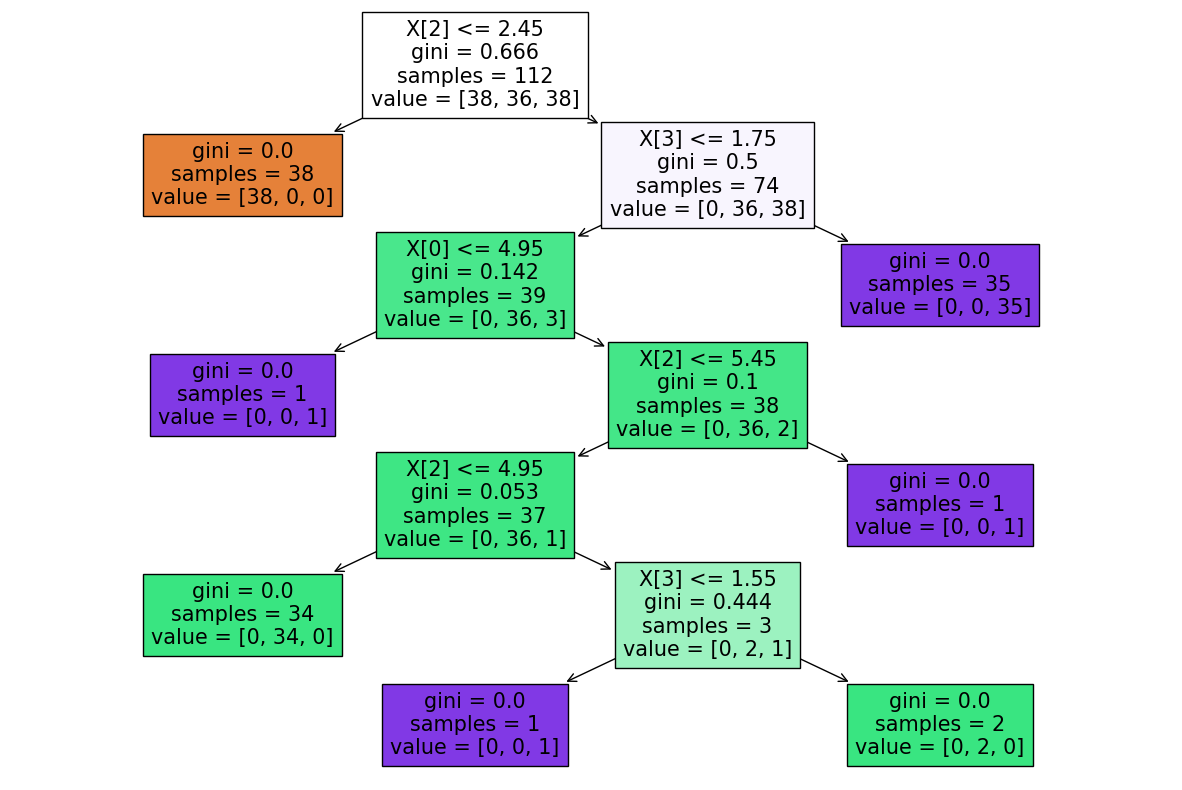

In [46]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Dtree,filled=True)
plt.savefig("Decision_tree.png")

In [52]:
pred=Dtree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)*100

94.73684210526315

In [47]:
pd.Series(pred).value_counts() # getting the count of each category 

Iris-versicolor    20
Iris-virginica     20
Iris-setosa        20
dtype: int64

In [48]:
y_test.value_counts()

Iris-versicolor    14
Iris-virginica     12
Iris-setosa        12
Name: Species, dtype: int64

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
Dtree.predict([[5.1, 4, 4, 3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [55]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [56]:
print(confusion_matrix(y_test,pred))

[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


In [57]:
dt = confusion_matrix(y_test, pred)

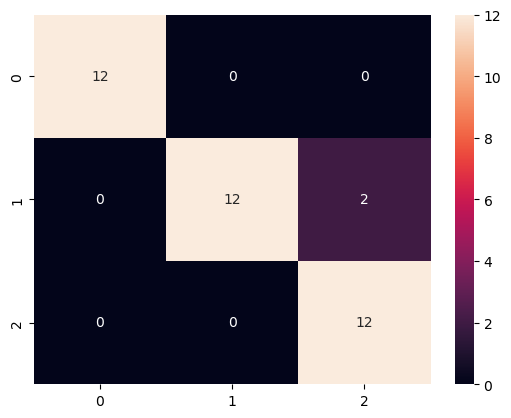

In [58]:
sns.heatmap(dt,annot=True)
plt.savefig('ConfusionDT.png')

In [76]:
print("Testing Accuracy","\n")
Dtree.score(X_test,y_test)

Testing Accuracy 



0.9473684210526315

In [77]:
scores = cross_val_score(Dtree, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [78]:
scores.mean()*100

96.66666666666669